In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('D:/DataSet')

In [104]:
df = pd.read_csv('total_amt.csv',encoding='gbk')

In [33]:
base = pd.read_csv('./PRD/base.csv')

In [89]:
df = df.fillna(0)

In [106]:
df['report_date'] = pd.to_datetime(df['report_date'],format='%Y/%m/%d')
df.set_index('report_date', inplace=True)

In [107]:
train = df.loc[:'2014-08-30',:]
test = df.loc['2014-09-01':,:]

In [108]:
purchase = train.pop('total_purchase_amt')
redeem = train.pop('total_redeem_amt')

In [109]:
test = test.drop(['total_purchase_amt', 'total_redeem_amt'], axis=1)

In [94]:
from sklearn import linear_model as lm

In [95]:
model = lm.LinearRegression()
model = model.fit(train, purchase)

In [96]:
pur = model.predict(test)

In [97]:
model1 = lm.LinearRegression()
model1 = model.fit(train, redeem)
red = model1.predict(test)

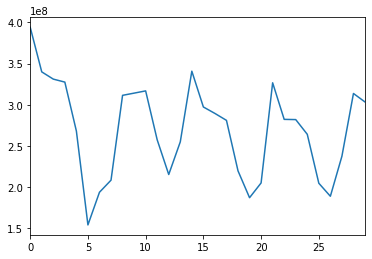

In [98]:
pd.Series(pur).plot()

In [99]:
def to_result(purchase, redeem):
    report_date=list(range(20140901,20140931))
    sub=pd.DataFrame()
    sub['purchase']=purchase
    sub['redeem']=redeem
    sub=sub.reset_index()
    sub['index']=report_date
    sub=sub.rename(columns={'index':'report_date'})
    sub[['purchase','redeem']]=sub[['purchase','redeem']].astype(np.int64)
    sub=sub.set_index(['report_date'])
    sub.to_csv('tc_comp_predict_table5.csv',sep=',')
    
to_result(pur, red)

In [100]:
from lightgbm import LGBMRegressor

In [119]:
model = LGBMRegressor(num_leaves=10,
    max_depth=2,
    learning_rate=0.01,
    n_estimators=500,)
res = model.fit(train.to_numpy(), purchase)

In [120]:
predpur = res.predict(test.to_numpy())

In [116]:
model1 = LGBMRegressor(num_leaves=10,
    max_depth=2,
    learning_rate=0.01,
    n_estimators=500,)
res1 = model1.fit(train.to_numpy(), redeem)
predred = res.predict(test.to_numpy())

In [121]:
to_result(predpur, predred)

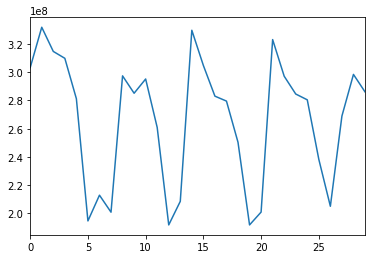

In [122]:
pd.Series(predpur).plot()

In [36]:
base['date'] = pd.to_datetime(base['date'], format='%Y%m%d')
base.set_index('date', inplace=True)

In [38]:
purchase = base.loc['2014-04':'2014-08-30', 'total_purchase_amt']
redeem = base.loc['2014-04':'2014-08-30', 'total_redeem_amt']

In [41]:
purchase_base = base.loc['2014-09-01':'2014-09-30',
                         'total_purchase_predicted_by_cycle']
redeem_base = base.loc['2014-09-01':'2014-09-30',
                         'total_redeem_predicted_by_cycle']

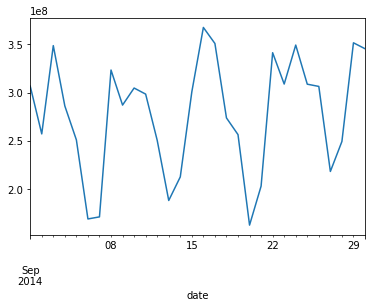

In [50]:
redeem_base.plot()